In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
plt.rc('text', usetex=True)
plt.rc('font', size=22, **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['savefig.bbox'] = 'tight'

In [25]:
save = True

In [26]:
df_mono = pd.read_excel('results/results_single_layers.xlsx', index_col='Name')
df_multi = pd.read_excel('results/results.xlsx', index_col='Name')

In [46]:
labels = df_mono.Label.unique()
assert (labels == df_multi.Label.unique()).all()

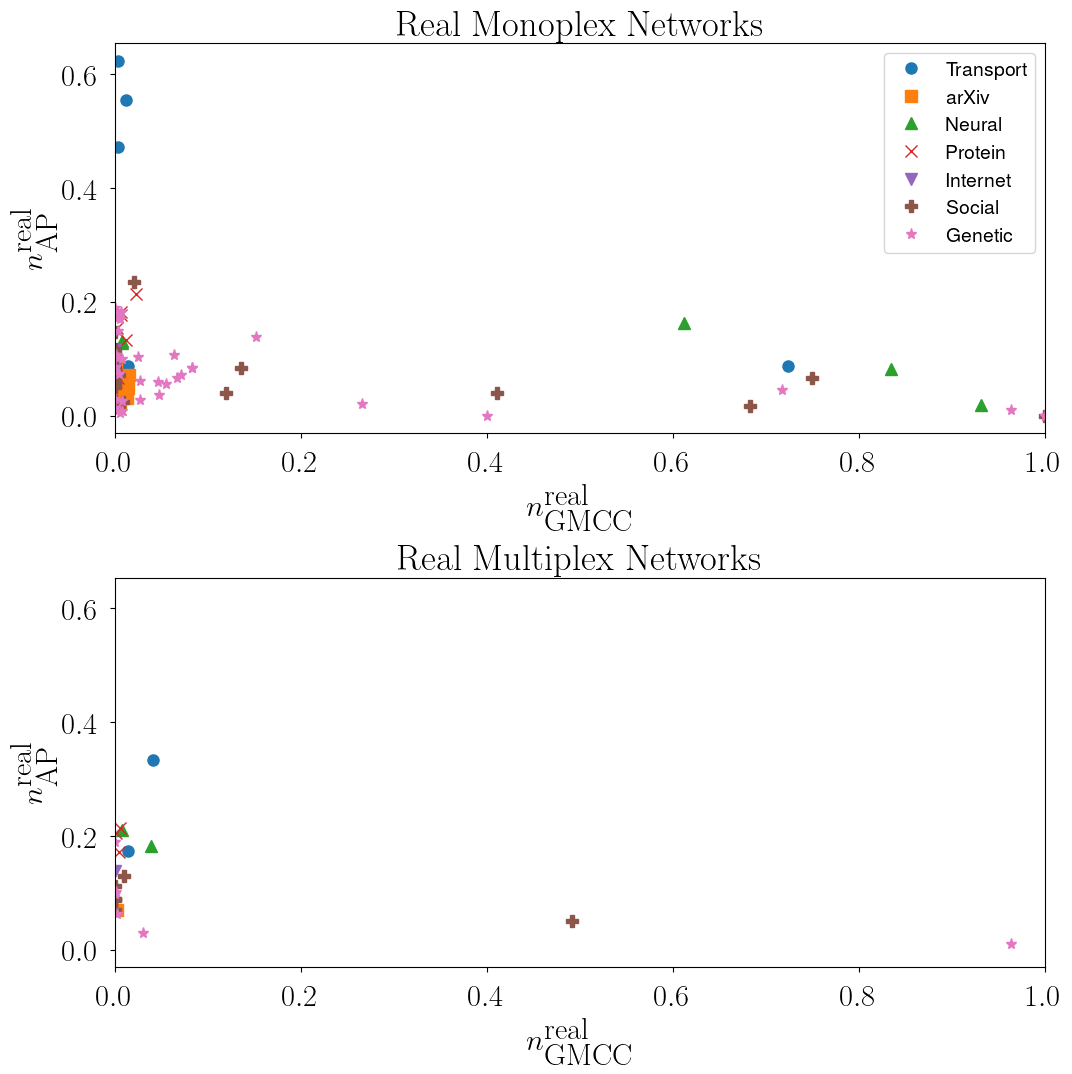

In [59]:
n_gcc_final = {label: [] for label in labels}
n_ap = {label: [] for label in labels}

for dataset in df_mono.index.unique():

    layers = df_mono.loc[dataset, 'Layer']
    if hasattr(layers, 'unique'):
        layers = layers.unique()
    else:
        layers = [layers]

    label = df_mono.loc[dataset, 'Label'].iloc[0]

    for layer in layers:
        n_gcc_final[label].append(
            df_mono.loc[(df_mono.index == dataset) & (df_mono.Layer == layer), 's_GCC'].iloc[-1],
        )
        n_ap[label].append(
            df_mono.loc[(df_mono.index == dataset) & (df_mono.Layer == layer), 'n_AP'].iloc[0],
        )

fig, ax = plt.subplots(nrows=2, figsize=(12, 12))

fmts = ['o--', 's--', '^--', 'x--', 'v--', 'P--', '*--', '.--',
        '4--', '<--', '>--', 'p--', 'h--', 'H--', '+--', 'D--',
        '1--', '2--', '3--', '8--', 'X--', 'd--', '|--', '_--']
fmts = [fmt[0] for fmt in fmts]

for fmt, lbl in zip(
    fmts,
    labels,
):
    ax[0].plot(n_gcc_final[lbl], n_ap[lbl], fmt, label=lbl, ms=8)

ax[0].set_xlabel(r'$n_{\textrm{GMCC}}^{\textrm{real}}$')
ax[0].set_ylabel(r'$n_{\textrm{AP}}^{\textrm{real}}$')
ax[0].set_title(r'$\textrm{Real Monoplex Networks}$')
ax[0].set_xlim(0, 1)
b, t = ax[0].get_ylim()

n_gcc_final = {label: [] for label in labels}
n_ap = {label: [] for label in labels}

for dataset in df_multi.index.unique():

    label = df_multi.loc[dataset, 'Label'].iloc[0]

    n_gcc_final[label].append(
        df_multi.loc[dataset, 's_GCC'].iloc[-1],
    )
    n_ap[label].append(
        df_multi.loc[dataset, 'n_AP'].iloc[0],
    )

for fmt, lbl in zip(
    fmts,
    labels
):
    ax[1].plot(n_gcc_final[lbl], n_ap[lbl], fmt, label=lbl, ms=8)

ax[1].set_xlabel(r'$n_{\textrm{GMCC}}^{\textrm{real}}$')
ax[1].set_ylabel(r'$n_{\textrm{AP}}^{\textrm{real}}$')
ax[1].set_title(r'$\textrm{Real Multiplex Networks}$')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(b, t)

ax[0].legend(
    prop={'size': 14},
    # bbox_to_anchor=(1.45, 2),
)
plt.subplots_adjust(hspace=.37)

if save:
    fig.savefig(f'AP_vs_GCC_work_revision.png')
    fig.savefig(f'AP_vs_GCC_work_revision.pdf')